# Noise2Void - 3D Example for Flywing Data

__Note:__ This notebook expects a trained model and will only work if you have executed the `01_training.ipynb` beforehand.

In [1]:
import os
import numpy as np
# import working directory to check functions
os.chdir('/Users/Dominik/R-workspace/cecelia/inst')

# MacOS
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

# config
import py.config_utils as cfg

%load_ext autoreload
%autoreload 2

In [2]:
# We import all our dependencies.
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from csbdeep.io import save_tiff_imagej_compatible

## Load the Network

In [3]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.
#model_name = 'n2v_3P_ubiTom'
model_name = 'n2v_3P_XCR1'
basedir = '/Users/Dominik/Downloads/n2v'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


In [4]:
# In case you do not want to load the weights that lead to lowest validation loss during 
# training but the latest computed weights, you can execute the following line:

# model.load_weights('weights_last.h5')

## Prediction
Here we will simply use the same data as during training and denoise it using our network.

In [5]:
base_dir = '/Volumes/USER_data/Dominik/CECELIA_BACKUP/CV5iNI/ANALYSIS/'
version_num = 1
task_dir = os.path.join(base_dir, str(version_num), 'fmjlDg')

In [6]:
# load all images from training test set
uids = ['ocGpqr', 'FSotUw', 'vJV9by', 'tM949V', '50ymIS', '2DWW5C', '6J6z8t', 'nuL8W0', '5EZW5E', 'WzDKfW', 'ZLATW0', 'Qphi2J', 'MWQBVD', 'YBq5rm', '588Dj0', 'IzjXlv', 'QdjG8p', 'CfTwJD', 'bqdS4D', 'eXhH0u', 'qcwblF', 'I32uRk', '5OfZTY', 'yJyPDn', 'btZFiO', 'zRyuzO', 'EbYjEw', 'eAX4fZ', 'RpFBeG', '0wlkTG', 'TVf7C7', '0WkJ2n', 'pR8OoS', 'D3rG8h', 'wVL31E', 'kI45Yr', 'EFSIfI', 'KuY1Nm', 'ryKCBh', 'IcNmah', 'qvhTEJ', '8yr0h5', '1TqO7r', 'xIkEjm', 'gf6vXf', 'v1De25', 'x8sHW6', 'HXO9hG', 'SF82TQ', '0OvjSI', 'KQZxwr', 'm2n2Ft', 'PGCD8S', 'AdYO7L', 'SYXMth', '7dBggN', 'z6Jti0', 'XnVCIm', 'vjENx0', 'WFpe38', 'OWodvg', '0nNQWs', 'QrRXBk', 'GSUOLg', 'qC8o1T', '27p88D', 'G49ZZx', '23BeFx', 'g0jRwo', 'E14r6I']

In [7]:
# XCR1
uids = ['WvmInm', '43Wrm6', 'zGJ6Zx', 'r0lLnq', 'irQcyT', 'xrpULx', 'NJvsNY', 'RgC7Wn', 'F5JvHp', '0XIgdc', 'VsY1bp', '5uVnh2', '3nNcPG', 'AZ1f7k', 'FcbjWa', '7oh2II', 'xAivFa', 'DyLaDq', 'ZAWNaT', 'HhKbUR', 'COnsaW', 'HTWRuh', '2JxLGc', 'YuMg8j', 'pnjMea', 'r30OyS', 'mskvXN', 'FrimIN', 'stm1J4', '4Ky14J', 'Ti2xhq', 'ajiVG3', 'z43ZmK', 'a5N98R', 'EWyt7S', 'uxXWQW', 'Rj5rxu', 'zsROWp', 'NSupPO', 'encBlg', 'KDVAxS', 'H9uFRN', 'lFuBwE', '9GaL76', 'ApHcZ5', 'jiI7v6', 'kStCa2', '8M6efc', 'Tvr1BS', '7SFBI6', 'PuViWT', 'TqPA9L', '5nTQdi', 'EMaQj2', 'DSRdqh', 'yz1yhZ', '0niKqI', 'rDKeGd', 'uhf9Xx', '5mwG5V', '8uHyK7', 'zBZm20', 'JhdPZU', 'RufKxs', 'FHIGav', 'vkAjt0', 'otPUph', 'tZpWza', 'LRttqF', '7LFxXL']

In [8]:
import py.zarr_utils as zarr_utils
import skimage.filters

# get zarr
# imgs = {i: zarr_utils.open_as_zarr(os.path.join(base_dir, '0', i, 'ccidImage.zarr')) for i in uids}
imgs = [zarr_utils.open_as_zarr(os.path.join(base_dir, '0', i, 'ccidImage.zarr')) for i in uids]

# get arrays
# imgs = {i: np.squeeze(np.array(zarr_utils.fortify(x[0]))) for i, x in imgs.items()}
imgs = [np.squeeze(np.array(zarr_utils.fortify(x[0]))) for x in imgs]

# add gaussian
# imgs = [skimage.filters.gaussian(x, sigma = 1) for x in imgs]

<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<zarr.hierarchy.Group '/' read-only>
<

The input image is of type uint16 and will be casted to float32 for prediction.
1/1 [==============================] - 0s 464ms/step


  6%|████▊                                                                        | 1/16 [00:00<00:00, 72315.59it/s]

1/1 [==============================] - 0s 452ms/step


 12%|██████████                                                                      | 2/16 [00:00<00:03,  3.97it/s]

1/1 [==============================] - 0s 450ms/step


 19%|███████████████                                                                 | 3/16 [00:01<00:04,  2.81it/s]

1/1 [==============================] - 0s 457ms/step


 25%|████████████████████                                                            | 4/16 [00:01<00:04,  2.41it/s]

1/1 [==============================] - 0s 448ms/step


 31%|█████████████████████████                                                       | 5/16 [00:02<00:04,  2.24it/s]

1/1 [==============================] - 0s 448ms/step


 38%|██████████████████████████████                                                  | 6/16 [00:02<00:04,  2.15it/s]

1/1 [==============================] - 0s 436ms/step


 44%|███████████████████████████████████                                             | 7/16 [00:03<00:04,  2.12it/s]

1/1 [==============================] - 0s 434ms/step


 50%|████████████████████████████████████████                                        | 8/16 [00:03<00:03,  2.10it/s]

1/1 [==============================] - 0s 441ms/step


 56%|█████████████████████████████████████████████                                   | 9/16 [00:03<00:03,  2.07it/s]

1/1 [==============================] - 0s 458ms/step


 62%|█████████████████████████████████████████████████▍                             | 10/16 [00:04<00:02,  2.03it/s]

1/1 [==============================] - 0s 439ms/step


 69%|██████████████████████████████████████████████████████▎                        | 11/16 [00:04<00:02,  2.03it/s]

1/1 [==============================] - 0s 458ms/step


 75%|███████████████████████████████████████████████████████████▎                   | 12/16 [00:05<00:01,  2.01it/s]

1/1 [==============================] - 0s 441ms/step


 81%|████████████████████████████████████████████████████████████████▏              | 13/16 [00:06<00:01,  2.01it/s]

1/1 [==============================] - 0s 434ms/step


 88%|█████████████████████████████████████████████████████████████████████▏         | 14/16 [00:06<00:00,  2.02it/s]

1/1 [==============================] - 0s 431ms/step


 94%|██████████████████████████████████████████████████████████████████████████     | 15/16 [00:06<00:00,  2.03it/s]

1/1 [==============================] - 0s 441ms/step


100%|███████████████████████████████████████████████████████████████████████████████| 16/16 [00:07<00:00,  2.14it/s]


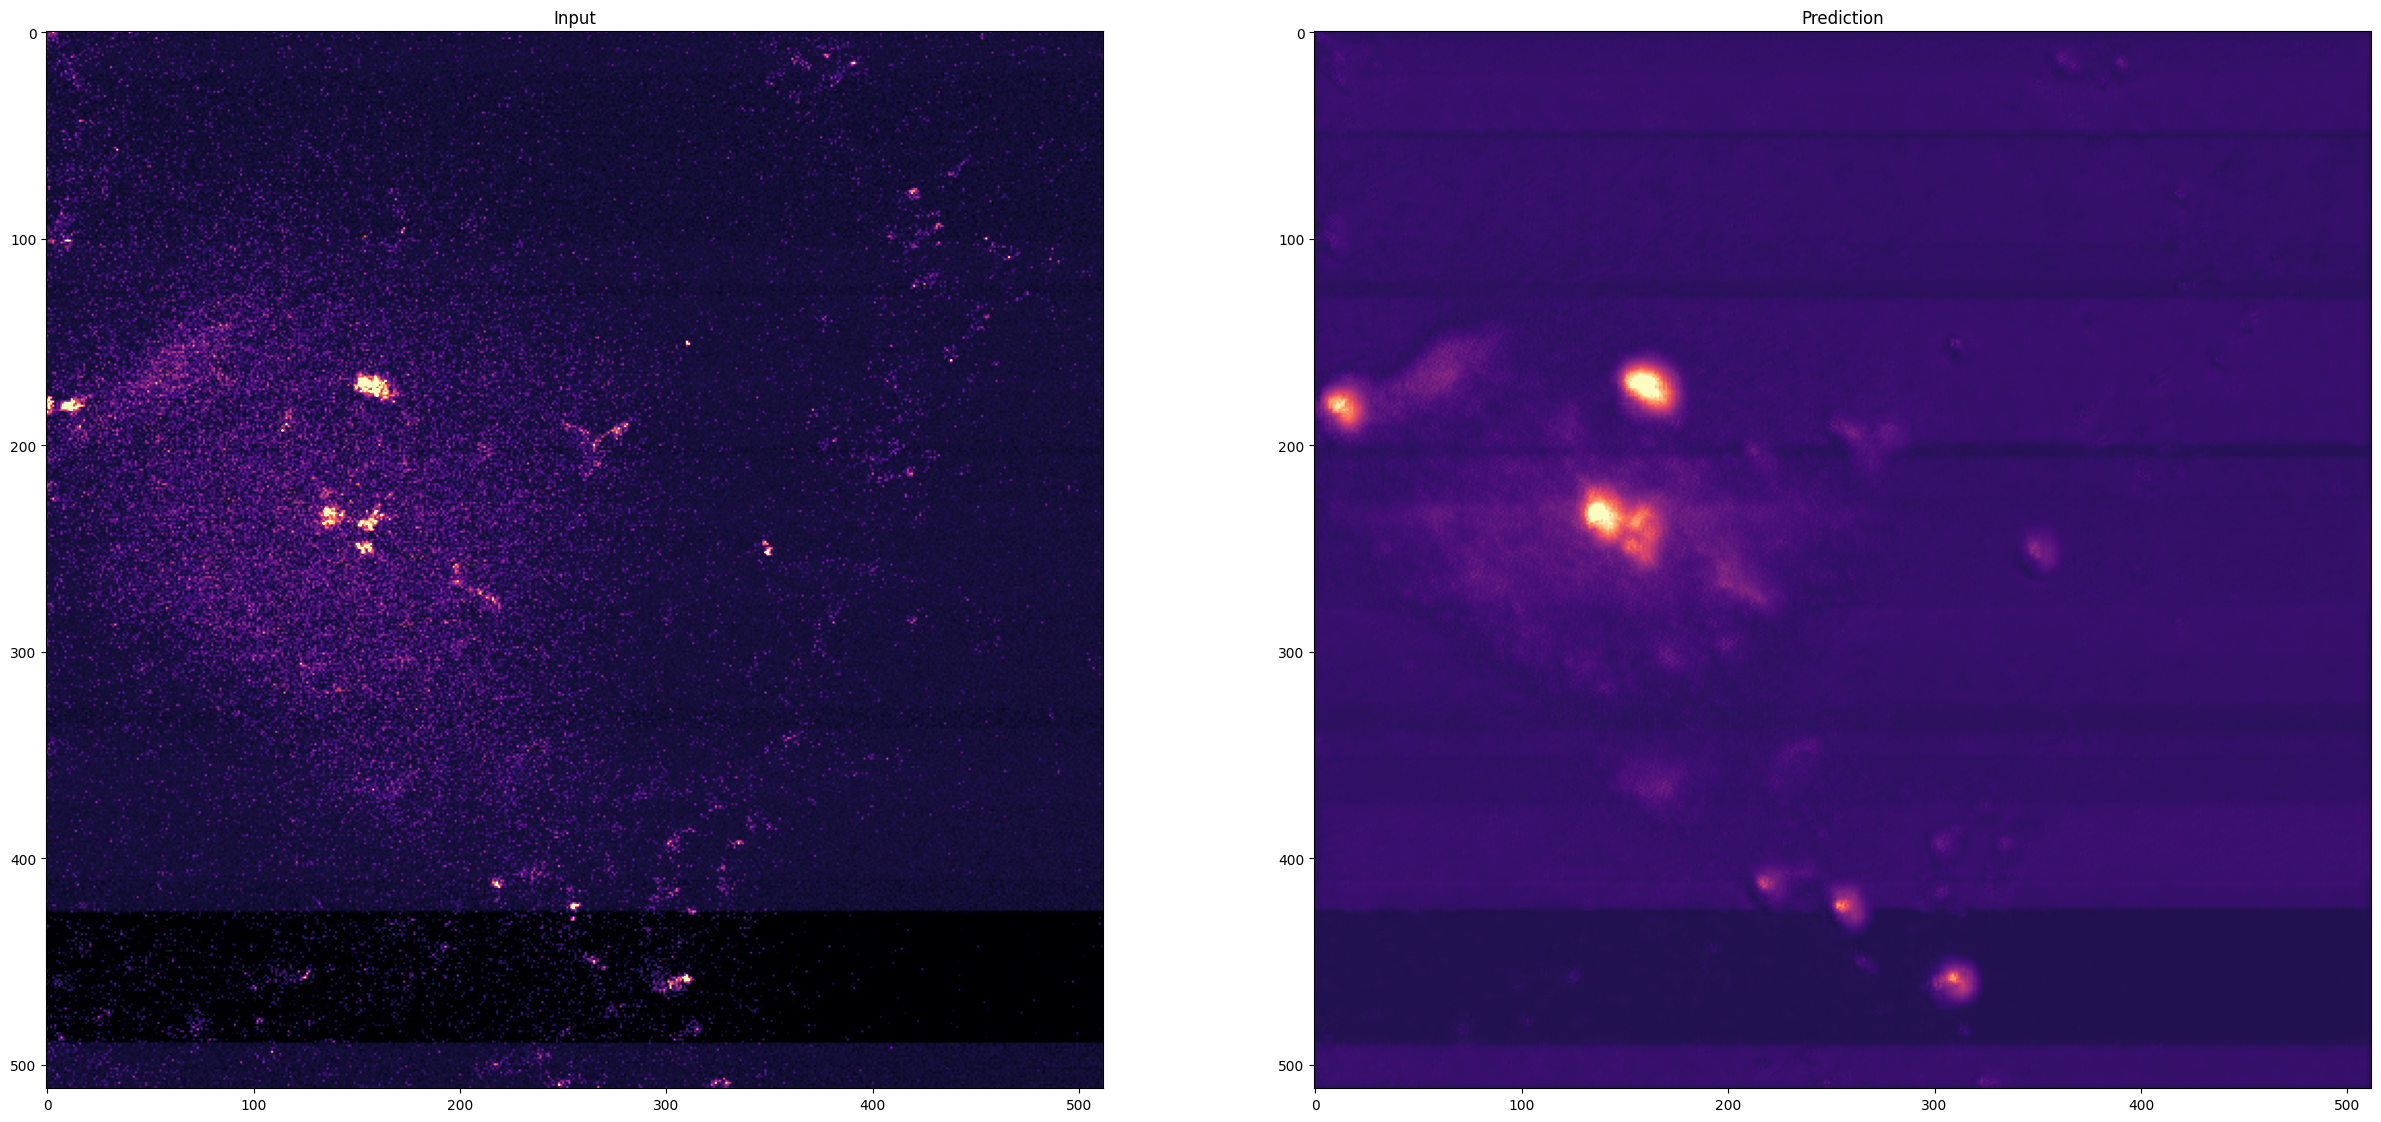

In [22]:
import random

# Here we process the data.
img = imgs[random.randint(0, len(imgs)-1)]

# The 'n_tiles' parameter can be used if images are too big for the GPU memory.
# If we do not provide the 'n_tiles' parameter the system will automatically try to find an appropriate tiling.
pred = model.predict(img, axes='ZYX', n_tiles=(2,4,4))

# Let's look at the results.
plt.figure(figsize=(30,30))

# We show the noisy input...
plt.subplot(1,2,1)
plt.imshow(np.max(img, axis = 0),
           cmap='magma',
           vmin=np.percentile(img,0.01),
           vmax=np.percentile(img,99.99)
          )
plt.title('Input');

# and the result.
plt.subplot(1,2,2)
plt.imshow(np.max(pred, axis = 0),
           cmap='magma',
           vmin=np.percentile(pred,0.01),
           vmax=np.percentile(pred,99.99)
          )
plt.title('Prediction');

## Save results

In [ ]:
save_tiff_imagej_compatible('ori.tif', img, 'ZYX')
save_tiff_imagej_compatible('prediction.tif', pred, 'ZYX')